Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [60]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import nsfg
df = nsfg.ReadFemPreg()
df.head(10)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


Print value counts for <tt>birthord</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [3]:
df.birthord.value_counts().sort_index()

1     4413
2     2874
3     1234
4      421
5      126
6       50
7       20
8        7
9        2
10       1
dtype: int64

Print value counts for <tt>prglngth</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [66]:
print(df['prglngth'].value_counts().sort_index().ix[0:13].sum())
print(df['prglngth'].value_counts().sort_index().ix[14:26].sum())
print(df['prglngth'].value_counts().sort_index().ix[27:50].sum())

3522
793
9278


Print value counts for <tt>agepreg</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611935).

Looking at this data, please remember my comments in the book about the obligation to approach data with consideration for the context and respect for the respondents.

In [5]:
df['agepreg'].value_counts().sort_index()

10.33     1
10.50     1
10.83     1
10.91     1
11.08     1
11.41     1
11.50     1
11.75     2
12.08     1
12.25     1
12.41     2
12.50     1
12.66     2
12.75     1
12.83     2
12.91     1
13.00     2
13.08     1
13.16     1
13.25     4
13.33     1
13.50     3
13.58     2
13.66     5
13.75     4
13.83     5
13.91     5
14.00     5
14.08     7
14.16    12
         ..
40.50     6
40.58     4
40.66     4
40.75     2
40.83     4
40.91     4
41.00     2
41.08     2
41.16     2
41.25     6
41.33     1
41.41     2
41.58     4
41.75     3
41.83     1
41.91     4
42.08     2
42.16     1
42.25     1
42.33     1
42.41     1
42.50     2
42.58     2
42.75     2
43.00     3
43.16     1
43.25     4
43.58     3
43.91     1
44.08     1
dtype: int64

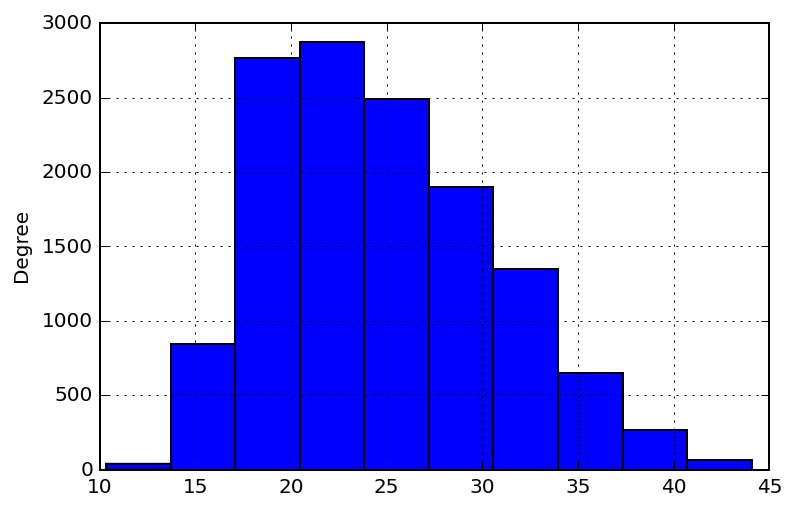

In [6]:
df['agepreg'].plot(kind='hist')

Compute the mean birthweight.

In [7]:
df.totalwgt_lb.mean()

7.2656284576233681

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [8]:
df['totalwgt_kg'] = df['totalwgt_lb'] / 2.2

In [9]:
df['totalwgt_kg'].mean()

3.3025583898288029

Look through the codebook and find a variable, other than the ones mentioned in the book, that you find interesting.  Compute values counts, means, or other statistics.

In [10]:
cols = df.columns.tolist()
print cols

[u'caseid', u'pregordr', u'howpreg_n', u'howpreg_p', u'moscurrp', u'nowprgdk', u'pregend1', u'pregend2', u'nbrnaliv', u'multbrth', u'cmotpreg', u'prgoutcome', u'cmprgend', u'flgdkmo1', u'cmprgbeg', u'ageatend', u'hpageend', u'gestasun_m', u'gestasun_w', u'wksgest', u'mosgest', u'dk1gest', u'dk2gest', u'dk3gest', u'bpa_bdscheck1', u'bpa_bdscheck2', u'bpa_bdscheck3', u'babysex', u'birthwgt_lb', u'birthwgt_oz', u'lobthwgt', u'babysex2', u'birthwgt_lb2', u'birthwgt_oz2', u'lobthwgt2', u'babysex3', u'birthwgt_lb3', u'birthwgt_oz3', u'lobthwgt3', u'cmbabdob', u'kidage', u'hpagelb', u'birthplc', u'paybirth1', u'paybirth2', u'paybirth3', u'knewpreg', u'trimestr', u'ltrimest', u'priorsmk', u'postsmks', u'npostsmk', u'getprena', u'bgnprena', u'pnctrim', u'lpnctri', u'workpreg', u'workborn', u'didwork', u'matweeks', u'weeksdk', u'matleave', u'matchfound', u'livehere', u'alivenow', u'cmkidied', u'cmkidlft', u'lastage', u'wherenow', u'legagree', u'parenend', u'anynurse', u'fedsolid', u'frsteatd_n',

In [11]:
df['matleave'].value_counts().sort_index()

0     421
1      36
2      61
3      37
4      70
5      26
6     230
7      19
8     113
9      24
10     49
11      8
12     85
13      4
14      5
15      4
16     15
17      1
18      1
19      2
20      7
22      1
24      6
25      2
26      2
30      1
32      5
36      2
38      1
40      1
50      1
52      1
97      1
99      3
dtype: int64

In [12]:
df['knewpreg'].value_counts().sort_index()

0       12
1      147
2      471
3      459
4     1050
5      349
6      578
7      126
8      398
9       51
10      53
11      12
12     146
13      10
14      11
15       4
16      46
17       3
18       2
19       1
20      27
21       3
22       2
23       2
24      11
26       1
27       1
28       2
29       1
30       1
35       1
40       2
98       2
99      27
dtype: int64

Create a boolean Series.

In [13]:
df.outcome == 1

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13       False
14       False
15        True
16        True
17        True
18       False
19        True
20        True
21        True
22       False
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
13563     True
13564     True
13565     True
13566     True
13567    False
13568    False
13569     True
13570     True
13571     True
13572     True
13573     True
13574     True
13575    False
13576     True
13577    False
13578     True
13579     True
13580    False
13581     True
13582    False
13583    False
13584     True
13585    False
13586    False
13587    False
13588     True
13589    False
13590    False
13591     True
13592     True
Name: outcome, dtype: bool

Use a boolean Series to select the records for the pregnancies that ended in live birth.

In [14]:
live = df[df.outcome == 1]
len(live)

9148

Count the number of live births with <tt>birthwgt_lb</tt> between 0 and 5 pounds (including both).  The result should be 1125.

In [15]:
len(live[(live.birthwgt_lb >= 0) & (live.birthwgt_lb <= 5)])

1125

Count the number of live births with <tt>birthwgt_lb</tt> between 9 and 95 pounds (including both).  The result should be 798 

In [16]:
len(live[(live.birthwgt_lb >= 9) & (live.birthwgt_lb <= 95)])

798

Use <tt>birthord</tt> to select the records for first babies and others.  How many are there of each?

In [17]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
len(firsts), len(others)

(4413, 4735)

Compute the mean weight for first babies and others.

In [18]:
firsts.totalwgt_lb.mean()

7.201094430437772

In [19]:
others.totalwgt_lb.mean()

7.3258556149732623

Compute the mean <tt>prglngth</tt> for first babies and others.  Compute the difference in means, expressed in hours.

In [20]:
# prglngth is in weeks

firsts.prglngth.mean()

38.600951733514613

In [21]:
others.prglngth.mean()

38.522914466737063

In [22]:
(firsts.prglngth.mean() - others.prglngth.mean()) * 7 * 24

13.110260818628319

In [25]:
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125,4.005682
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750,3.579545
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250,4.147727
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000,3.181818
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875,2.812500


In [ ]:
import chap01ex

In [23]:
df_resp = chap01ex.ReadFemResp()
df_resp.head(10)

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667
5,845,1,5,4,1,5,42,42,727,42,...,0,2335.279149,3725.796795,4705.681352,2,18,1234,1222,17:10:13,95.488000
6,10333,5,5,3,1,5,17,17,1029,17,...,0,2335.279149,2687.399758,3139.151658,2,18,1236,1224,14:14:38,61.204333
7,855,5,5,4,5,5,22,22,965,22,...,0,4670.558298,7122.614751,10019.382170,2,18,1235,1223,14:42:52,59.756333
8,8656,5,5,4,1,5,38,38,780,38,...,0,5198.652195,6027.568848,6520.021223,2,18,1237,1225,15:32:34,56.978833
9,3566,5,5,4,5,5,21,21,974,21,...,0,2764.142038,3240.986558,4559.095792,2,18,1231,1219,16:22:25,104.744667


In [24]:
df_resp['pregnum'].value_counts().sort_index()

0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
dtype: int64

In [62]:
passed = chap01ex.ValidatePregnum(df_resp)
print(passed)

True
